- 16_Data.csv와 15_Data.csv 데이터를 결합해 아래와 같이 분석을 수행합니다. ( 두 데이터는 어느 한 정형외과에서 나온 척추 환자 디스크 수술 데이터)
- 15_Data.csv : 수술 후에 측정한 환자의 건강 상태 / 수술 실패여부 / 재발여부 데이터
- 16_Data.csv : 수술 이전에 환자로 부터 수집된 환자 신체정보 데이터

1. 15_Data.csv데이터와 16_Data.csv데이터를 가져와 "환자ID"를 기준으로 병합하여, df1 으로 선언하시오.
2. 환자 '성별'에 따라 '통증기간(월)', '헤모글로빈수치'의 평균의 차이가 있는지 검정 하시오.
3. 환자의 '신장'과 '체중'을 이용해 'BMI'수치를 계산하시오.
4. 환자의 '흡연여부'와 관련 있는 질병을 확인하고자 한다. '간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부', '신부전여부','암발병여부','우울증여부', '종양진행여부', '혈전합병증여부' 항목들 중, 흡연 여부에 대해 유의미한 차이가 있는 질병을 가설 검정을 통해 찾으시오.
5. 환자의 '직업'중 가장 많은 직업은 어떤 직업이며, 해당 직업 군의 남/여 성비를 확인하시오.
6. 수술에 성공했으나, 재발한 환자들의 특성을 살펴보고자 한다. 해당 환자들의 평균연령과 평균 BMI, 남/여 성비의 비율과 직업군의 빈도수를 확인하시오.
7. 통증기간과 환자의 통증정도의 상관성이 있는지 가설검정을 수행하여 확인하고, 상관계수를 확인하시오.
8. 환자의 신장과 체중을 입력했을 때, BMI수치를 계산하고, 해당 연령대의 환자들의 성별에 따른 평균 헤모글로빈수치, 평균 환자통증정도를 시각화하여 출력하는 함수를 생성하시오.
9. 과거에 수술했던 환자들의 특성을 파악하고자 한다. 해당 환자들의 직업군과 성별의 빈도수를 확인하고, 해당 환자들 중 BMI수치가 높은 상위 5명의 환자 명단을 출력하여 recurs_patient.xlsx로 저장하시오.
10. 수술실패여부를 목표변수로 환자의 기본 특성을 입력했을 때, 해당 환자가 수술을 실패할 지/ 하지 않을지 분류모델을 만들고자 한다. 아래의 조건을 이용해 분류모델을 생성하시오.
- X값에는 환자의 기본 정보(신체적 정보 + 직업)와 질병력이 포함되어야 합니다.
- Y값은 "수술실패여부"
- DecisionTree Classifier를 이용해 학습을 수행하세요.
- 특성 공학 기법은 자유롭게 적용하여 모델을 구성해 주세요.
- **단 학습 데이터의 과적합이 발생하면 안되며, 학습 성능 F1 Score 기준 40%이상 나와야 합니다.
-** 학습한 모델은 model_medical.sav로 저장해 주세요.

In [1]:
%config Completer.use_jedi = False
import pandas as pd
a=pd.read_csv(r"C:\Users\hanjw\Desktop\python\실습파일\15_Data.csv")
b=pd.read_csv(r"C:\Users\hanjw\Desktop\python\실습파일\16_Data.csv")

In [2]:
item = list(set(b.columns) - set(a.columns))
item.append("환자ID")

df1=pd.merge(a,b[item],on='환자ID')

2. 환자 '성별'에 따라 '통증기간(월)', '헤모글로빈수치'의 평균의 차이가 있는지 검정 하시오.

In [29]:
# 전체에서 드롭나를 하지 말것. 

In [3]:
import scipy.stats as stats
xx=df1[df1['성별']==1]['통증기간(월)'].dropna()
xy=df1[df1['성별']==2]['통증기간(월)'].dropna()
print(stats.normaltest(xx))
print(stats.normaltest(xy))# 정규성 안따름

stats.ranksums(xx,xy)# 중앙값이 같지 않다

NormaltestResult(statistic=1973.5186287263045, pvalue=0.0)
NormaltestResult(statistic=824.3852918801933, pvalue=9.705287099600454e-180)


RanksumsResult(statistic=-2.8632608163010476, pvalue=0.004193052551353649)

3. 환자의 '신장'과 '체중'을 이용해 'BMI'수치를 계산하시오.(체중(kg) / [신장(m)]2)

In [4]:
df1['BMI수치']=df1['체중']/((df1['신장']/100)**2)
df1

,Column 1,환자ID,수술기법,수술시간,수술실패여부,신장,연령,재발여부,체중,헤모글로빈수치,...,신부전여부,흡연여부,성별,고혈압여부,암발병여부,과거수술횟수,간질성폐질환,우울증여부,말초동맥질환여부,BMI수치
0,989,990PT,TELD,50.0,0,171,37,0,68.0,15.10,...,0,0,1,0,0,1,0,0,0,23.255019
1,1019,1020PT,TELD,55.0,0,162,27,0,57.0,13.10,...,0,0,2,0,0,0,0,0,0,21.719250
2,971,972PT,TELD,55.0,0,170,35,0,62.0,16.50,...,0,0,1,0,0,0,0,0,0,21.453287
3,1051,1052PT,TELD,30.0,0,174,34,0,75.0,15.10,...,0,1,1,0,0,0,0,0,0,24.772097
4,1050,1051PT,TELD,45.0,0,147,62,0,53.0,11.40,...,0,0,2,1,0,0,0,0,0,24.526818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,678,679PT,TELD,51.0,0,177,47,0,73.0,15.14,...,1,1,1,0,0,0,0,0,0,23.301095
1890,679,680PT,TELD,69.0,0,160,39,0,70.0,11.54,...,0,0,2,0,0,0,0,0,0,27.343750
1891,914,915PT,TELD,79.0,0,177,38,1,86.0,13.17,...,0,1,1,0,0,0,0,1,0,27.450605
1892,380,381PT,IELD,35.0,0,174,26,0,74.2,16.97,...,0,0,1,0,0,0,0,0,0,24.507861


4. 환자의 '흡연여부'와 관련 있는 질병을 확인하고자 한다. '간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부', '신부전여부','암발병여부','우울증여부', '종양진행여부', '혈전합병증여부' 항목들 중, 흡연 여부에 대해 유의미한 차이가 있는 질병을 가설 검정을 통해 찾으시오.

In [5]:
p1= pd.crosstab(index= df1['흡연여부'], columns= df1['간질성폐질환'])
a, p, n, table=stats.chi2_contingency(p1)
p

1.0

In [7]:
box= [ '간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부', '신부전여부','암발병여부',
      '우울증여부', '종양진행여부', '혈전합병증여부' ]
box2=[]
for i in box:
    p1= pd.crosstab(index= df1['흡연여부'], columns= df1[i])
    a, p, n, table=stats.chi2_contingency(p1)
    if p<0.05:
        box2.append(i)


In [8]:
box2 # 흡연 여부에 대해 유의미한 차이가 있는 질병

['빈혈여부']

5. 환자의 '직업'중 가장 많은 직업은 어떤 직업이며, 해당 직업 군의 남/여 성비를 확인하시오.

In [9]:
df1['직업'].value_counts().sort_values(ascending= False).head(1)

사무직    449
Name: 직업, dtype: int64

In [10]:
a=df1[df1['직업']=='사무직']

In [11]:
pd.crosstab(index=a['성별'], columns= '성별', normalize = True)

col_0,성별
성별,
1,0.641425
2,0.358575


6.수술에 성공했으나, 재발한 환자들의 특성을 살펴보고자 한다. 해당 환자들의 평균연령과 평균 BMI, 남/여 성비의 비율과 직업군의 빈도수를 확인하시오.

In [12]:
new =df1[(df1['수술실패여부']==0) & (df1['재발여부']==1)]
print(f"평균연령: {new['연령'].mean()}") # 평균연령
print(f"평균BMI: {new['BMI수치'].mean()}") # 평균BMI

평균연령: 43.72558139534884
평균BMI: 25.349856224344197


In [13]:
pd.crosstab(index=new['성별'],columns= "성별", normalize= True)

col_0,성별
성별,
1,0.67907
2,0.32093


In [14]:
pd.crosstab(index=new['직업'],columns= "직업")

col_0,직업
직업,
건설업,4
공무원,8
교사,6
군인,3
노동직,5
농업,4
무직,19
사무직,57
사업가,5


7. 통증기간과 환자의 통증정도의 상관성이 있는지 가설검정을 수행하여 확인하고, 상관계수를 확인하시오.7. 

In [15]:
sample=df1[['통증기간(월)','환자통증정도']].dropna()
A = sample['통증기간(월)']
B = sample['환자통증정도']
stats.normaltest(A)
stats.normaltest(B) #정규성을 따르지 않으므로 스피어만

stats.spearmanr(A,B)

#통증기간과 환자의 통증정도의 상관성이 없다

SignificanceResult(statistic=-0.010676647938840402, pvalue=0.6427450957438059)

8. 환자의 신장과 체중을 입력했을 때, BMI수치를 계산하고, 해당 연령대의 환자들의 성별에 따른 평균 헤모글로빈수치, 평균 환자통증정도를 시각화하여 출력하는 함수를 생성하시오.

In [17]:
def age (x):
    if x//10<1:
        return "어린이"
    else:
        return f"{x//10}0대"
    
df1['연령대']=df1['연령'].apply(age)


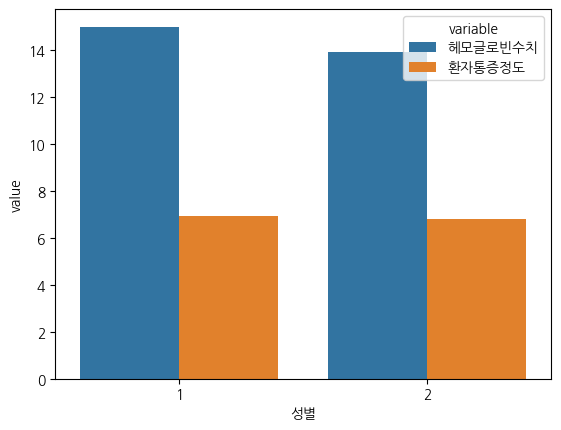

In [18]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
df1['연령대']=df1['연령'].apply(age)


new= df1.pivot_table(index= "성별", values= ["헤모글로빈수치",'환자통증정도'], aggfunc="mean").reset_index()
M=pd.melt(new, id_vars="성별")
sns.barplot(data=M, x= "성별", y="value", hue = 'variable')
plt.show()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


def func (x, y, z):
    bmi=y / ((x/100)**2)
    if x//10<1:
        a= "어린이"
    else:
        a= f"{z//10}0대"
    Age=df1[df1['연령대']==a]
    new= Age.pivot_table(index= "성별", values= ["헤모글로빈수치",'환자통증정도'], aggfunc="mean")
    M=pd.melt(new, id_vars="성별")
    sns.barplot(data=M, x= "성별", y="value", hue = 'variable')
    
func( 160, 45, 25)

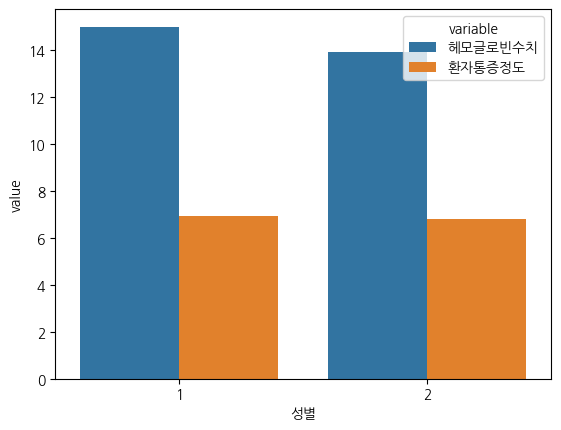

In [31]:
def func (x, y, z):
    bmi=y / ((x/100)**2)
    if z//10<1:
        a= "어린이"
    else:
        a= f"{z//10}0대"
    Age=df1[df1['연령대']==a]
    new2= Age.pivot_table(index= "성별", values= ["헤모글로빈수치",'환자통증정도'], aggfunc="mean").reset_index()
    M=pd.melt(new, id_vars="성별")
    sns.barplot(data=M, x= "성별", y="value", hue = 'variable')
    

func(160,48,25)



9. 과거에 수술했던 환자들의 특성을 파악하고자 한다. 해당 환자들의 직업군과 성별의 빈도수를 확인하고, 해당 환자들 중 BMI수치가 높은 상위 5명의 환자 명단을 출력하여 recurs_patient.xlsx로 저장하시오.

In [214]:
print(df1[df1['과거수술횟수']>=1]['직업'].value_counts())
print(df1[df1['과거수술횟수']>=1]['성별'].value_counts())

사무직      93
자영업      47
무직       40
주부       20
공무원      19
학생       15
운수업      11
군인       11
사업가       9
농업        8
노동직       7
의료직       7
특수전문직     5
교사        5
건설업       3
운동선수      2
예술가       1
Name: 직업, dtype: int64
1    254
2    141
Name: 성별, dtype: int64


In [215]:
a= df1[df1['과거수술횟수']>=1]
inx= a["BMI수치"].sort_values(ascending= False).head().index

In [216]:
inx

Int64Index([831, 759, 786, 233, 462], dtype='int64')

In [217]:
df1.iloc[inx,:].to_excel("recurs_patient.xlsx")

10. 수술실패여부를 목표변수로 환자의 기본 특성을 입력했을 때, 해당 환자가 수술을 실패할 지/ 하지 않을지 분류모델을 만들고자 한다. 아래의 조건을 이용해 분류모델을 생성하시오.

X값에는 환자의 기본 정보(신체적 정보 + 직업)와 질병력이 포함되어야 합니다.
Y값은 "수술실패여부"
DecisionTree Classifier를 이용해 학습을 수행하세요.
특성 공학 기법은 자유롭게 적용하여 모델을 구성해 주세요.
**단 학습 데이터의 과적합이 발생하면 안되며, 학습 성능 F1 Score 기준 40%이상 나와야 합니다.
** 학습한 모델은 model_medical.sav로 저장해 주세요.

In [218]:
df1.columns

Index(['Column 1', '환자ID', '수술기법', '수술시간', '수술실패여부', '신장', '연령', '재발여부', '체중',
       '헤모글로빈수치', '환자통증정도', '통증기간(월)', '혈액형', '수술일', '입원일', '퇴원일', '고혈압여부',
       '빈혈여부', '흡연여부', '직업', '신부전여부', '종양진행여부', '당뇨여부', '성별', '과거수술횟수', '입원기간',
       '심혈관질환', '말초동맥질환여부', 'ODI', 'Large Lymphocyte',
       'Location of herniation', '가족력', '스테로이드치료', '우울증여부', '혈전합병증여부', '암발병여부',
       '간질성폐질환', 'BMI수치'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
sampling_model = RandomOverSampler()

X= df1[['신장', '연령', '재발여부', '체중','헤모글로빈수치','혈액형','고혈압여부', '심혈관질환', '말초동맥질환여부','가족력',
    '스테로이드치료', '우울증여부', '혈전합병증여부', '암발병여부','간질성폐질환', 'BMI수치']]
Y= df1['수술실패여부']

X = pd.get_dummies(X)

X_resample, Y_resample = sampling_model.fit_resample(X, Y)


train_x, test_x, train_y, test_y = train_test_split(X_resample, Y_resample, test_size = 0.2)

dt = DecisionTreeClassifier(max_depth= 5)
dt.fit(train_x, train_y)
pred = dt.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.42      0.55       341
           1       0.63      0.92      0.75       371

    accuracy                           0.68       712
   macro avg       0.73      0.67      0.65       712
weighted avg       0.72      0.68      0.66       712



In [36]:
dt.score(train_x, train_y)

0.6830639494026705

In [49]:
dt.score(test_x, test_y)

0.6783707865168539